In [1]:
%load_ext autoreload
import sys
sys.path.append("..")

In [2]:
%matplotlib inline

In [7]:
%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

import numpy as np

import darkhistory.physics as phys

import main

In [12]:
helium_method_1 = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e24, primary='phot_delta',
    start_rs = 3000,
    coarsen_factor=1, backreaction=True,
    helium_TLA=True, compute_fs_method='old'
)

-0.8385835906917896


../darkhistory/physics.py:474: RuntimeWarning: invalid value encountered in double_scalars
  / (1 + 0.6703 * (conv_fac*T_m)**0.5300)
../darkhistory/physics.py:502: RuntimeWarning: invalid value encountered in sqrt
  * (1 + T_in_K/T_1)**(1+p)
../darkhistory/physics.py:502: RuntimeWarning: invalid value encountered in double_scalars
  * (1 + T_in_K/T_1)**(1+p)


-2.398373772130881
-1.7388836399262582


In [53]:
%autoreload
helium_method_2 = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e24, primary='phot_delta',
    start_rs = 3000,
    coarsen_factor=1, backreaction=True,
    helium_TLA=True, compute_fs_method='helium', rtol=1e-5
)

In [54]:
helium_method_3 = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e24, primary='phot_delta',
    start_rs = 3000,
    coarsen_factor=1, backreaction=True,
    helium_TLA=True, compute_fs_method='helium_recomb', rtol=1e-5
)

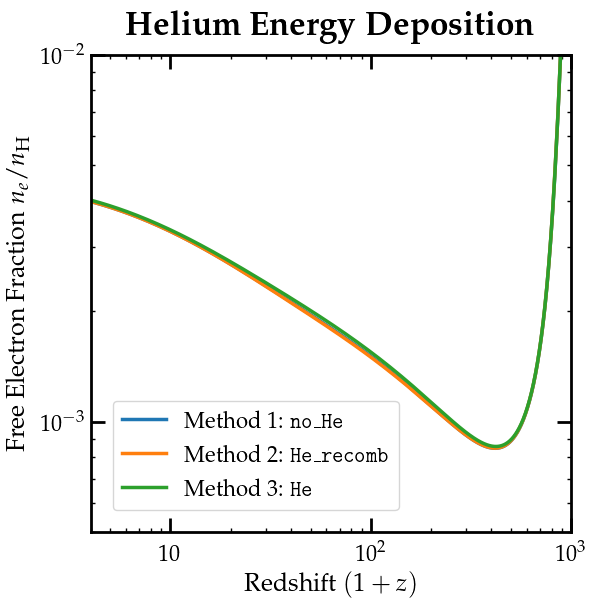

In [97]:
xe_plt = plt.figure()

plt.loglog()

plt.plot(helium_method_1['rs'], helium_method_1['x'][:,0]+helium_method_1['x'][:,1], label=r'Method 1: $\texttt{no\_He}$')
plt.plot(helium_method_3['rs'], helium_method_3['x'][:,0]+helium_method_3['x'][:,1], label=r'Method 2: $\texttt{He\_recomb}$')
plt.plot(helium_method_2['rs'], helium_method_2['x'][:,0]+helium_method_2['x'][:,1], label=r'Method 3: $\texttt{He}$')

plt.legend(loc='lower left')

plt.xlabel(r'Redshift $(1+z)$')
plt.ylabel(r'Free Electron Fraction $n_e/n_\mathrm{H}$')

plt.title(r'\bf{Helium Energy Deposition}')

plt.axis([4, 1e3, 5e-4, 1e-2])

plt.savefig('/Users/hongwan/Dropbox (MIT)/Photon Deposition/Draft/plots/He_f_method_xe.pdf')


In [94]:
?plt.savefig

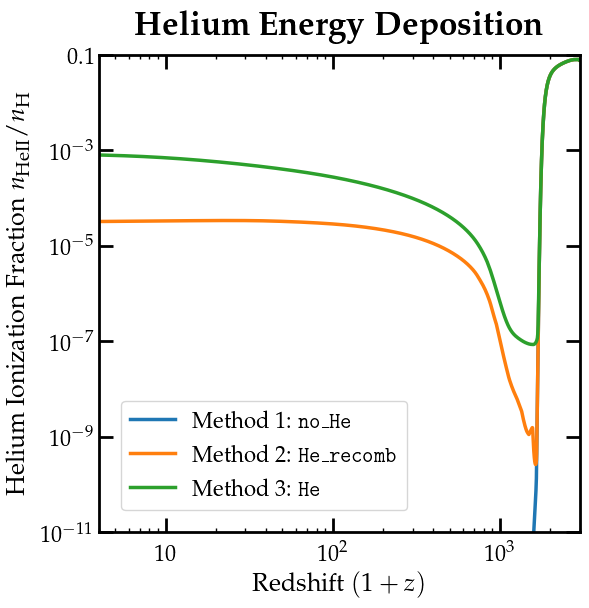

In [98]:
plt.figure()

plt.loglog()

plt.plot(helium_method_1['rs'], helium_method_1['x'][:,1], label=r'Method 1: $\texttt{no\_He}$')
plt.plot(helium_method_3['rs'], helium_method_3['x'][:,1], label=r'Method 2: $\texttt{He\_recomb}$')
plt.plot(helium_method_2['rs'], helium_method_2['x'][:,1], label=r'Method 3: $\texttt{He}$')

plt.legend(loc='lower left')

plt.xlabel(r'Redshift $(1+z)$')
plt.ylabel(r'Helium Ionization Fraction $n_\mathrm{HeII}/n_\mathrm{H}$')

plt.title(r'\bf{Helium Energy Deposition}')

plt.axis([4, 3e3, 1e-11, .1])

plt.savefig('/Users/hongwan/Dropbox (MIT)/Photon Deposition/Draft/plots/He_f_method_xHeII.pdf')



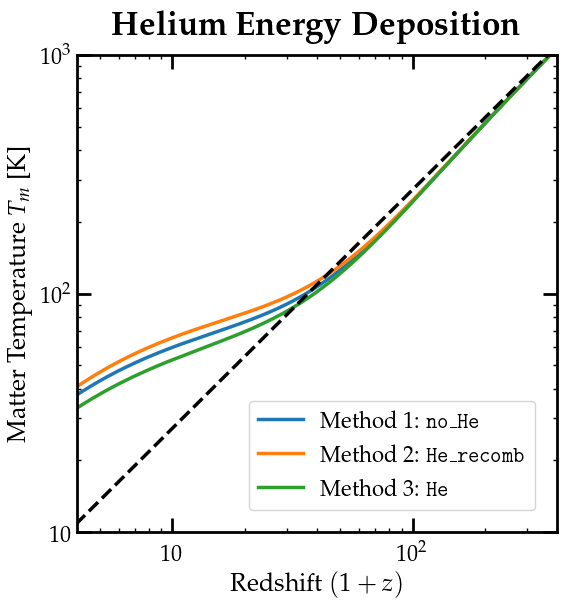

In [99]:
plt.figure()

plt.loglog()

plt.plot(helium_method_1['rs'], helium_method_1['Tm']/phys.kB, label=r'Method 1: $\texttt{no\_He}$')
plt.plot(helium_method_3['rs'], helium_method_3['Tm']/phys.kB, label=r'Method 2: $\texttt{He\_recomb}$')
plt.plot(helium_method_2['rs'], helium_method_2['Tm']/phys.kB, label=r'Method 3: $\texttt{He}$')

plt.plot(helium_method_1['rs'], phys.TCMB(helium_method_1['rs'])/phys.kB, 'k--')

plt.legend(loc='lower right')

plt.xlabel(r'Redshift $(1+z)$')
plt.ylabel(r'Matter Temperature $T_m$ [K]')

plt.title(r'\bf{Helium Energy Deposition}')

plt.axis([4, 400, 10, 1e3])

plt.savefig('/Users/hongwan/Dropbox (MIT)/Photon Deposition/Draft/plots/He_f_method_Tm.pdf')


In [104]:
import pickle 
pickle.dump(
    (helium_method_1, helium_method_2, helium_method_3), 
    open('/Users/hongwan/Dropbox (MIT)/Photon Deposition/Helium_f_cross_checks/data.p','wb')
)

In [131]:
coarsen_1 = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e24, primary='phot_delta',
    start_rs = 3000,
    coarsen_factor=1, backreaction=True,
    helium_TLA=True, reion_switch=True, compute_fs_method='old'
)

In [136]:
coarsen_2 = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e24, primary='phot_delta',
    start_rs = 3000,
    coarsen_factor=2, backreaction=True,
    helium_TLA=True, reion_switch=True, compute_fs_method='old', rtol=1e-5
)

In [138]:
coarsen_4 = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e24, primary='phot_delta',
    start_rs = 3000,
    coarsen_factor=4, backreaction=True,
    helium_TLA=True, reion_switch=True, compute_fs_method='old', rtol = 1e-5
)

In [143]:
coarsen_8 = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e24, primary='phot_delta',
    start_rs = 3000,
    coarsen_factor=8, backreaction=True,
    helium_TLA=True, reion_switch=True, compute_fs_method='old', rtol = 1e-5
)

In [146]:
coarsen_16 = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e24, primary='phot_delta',
    start_rs = 3000,
    coarsen_factor=16, backreaction=True,
    helium_TLA=True, reion_switch=True, compute_fs_method='old', rtol = 1e-5
)

In [149]:
coarsen_32 = main.evolve(
    DM_process='decay', mDM=1e8, lifetime=3e24, primary='phot_delta',
    start_rs = 3000,
    coarsen_factor=32, backreaction=True,
    helium_TLA=True, reion_switch=True, compute_fs_method='old', rtol = 1e-5
)

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


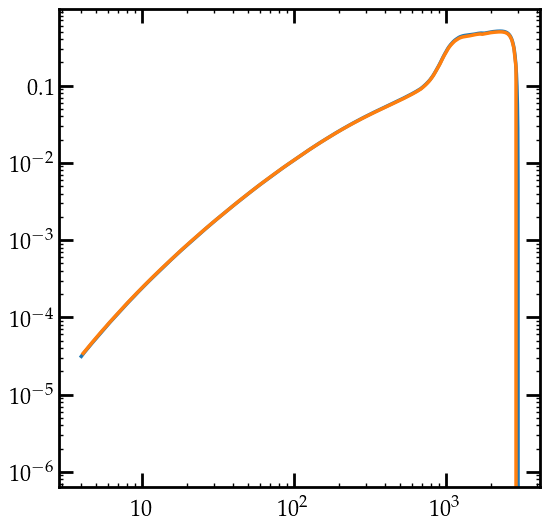

In [119]:
plt.figure()

plt.loglog()

plt.plot(coarsen_1['rs'], coarsen_1['f']['low']['heat'])
plt.plot(coarsen_32['rs'], coarsen_32['f']['low']['heat'])

[4, 3000, 10, 50000.0]

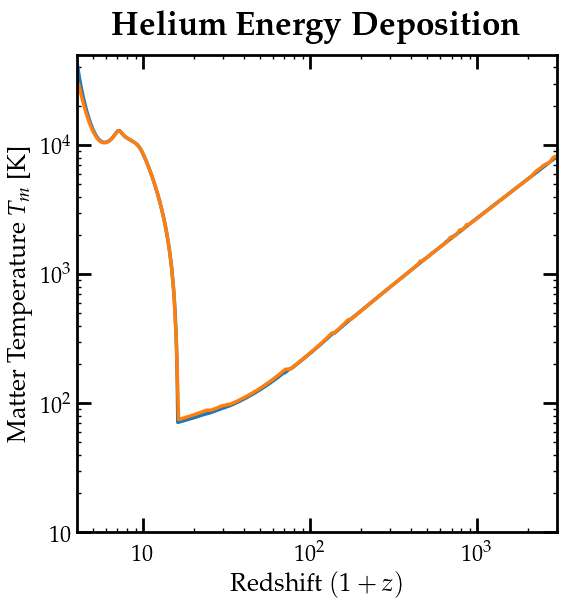

In [164]:
plt.figure()

plt.loglog()

plt.plot(coarsen_1['rs'], coarsen_1['Tm']/phys.kB)
# plt.plot(coarsen_2['rs'], coarsen_2['Tm']/phys.kB)
# plt.plot(coarsen_4['rs'], coarsen_4['Tm']/phys.kB)
# plt.plot(coarsen_8['rs'], coarsen_8['Tm']/phys.kB)
# plt.plot(coarsen_16['rs'], coarsen_16['Tm']/phys.kB)
plt.plot(coarsen_32['rs'], coarsen_32['Tm']/phys.kB)



plt.xlabel(r'Redshift $(1+z)$')
plt.ylabel(r'Matter Temperature $T_m$ [K]')

plt.title(r'\bf{Helium Energy Deposition}')

plt.axis([4, 3000, 10, 5e4])

In [129]:
coarsen_1

{'rs': array([3000.        , 2997.0014995 , 2994.005996  , ...,    4.00830143,
           4.00429513,    4.00029284]),
 'x': array([[9.99999999e-01, 7.88595679e-02],
        [9.99999999e-01, 8.03146173e-02],
        [9.99999999e-01, 8.03146345e-02],
        ...,
        [3.98493525e-03, 5.60523850e-14],
        [3.98551496e-03, 5.60523850e-14],
        [3.98609411e-03, 5.60523850e-14]]),
 'Tm': array([0.70446773, 0.70389177, 0.70318823, ..., 0.00324631, 0.00324416,
        0.00324201]),
 'highengphot': <darkhistory.spec.spectra.Spectra at 0x1084e03c8>,
 'lowengphot': <darkhistory.spec.spectra.Spectra at 0x1084e0208>,
 'lowengelec': <darkhistory.spec.spectra.Spectra at 0x1084e0390>,
 'f': {'low': {'H ion': array([array([0.]), array([1.22026889e-10]), array([0.00039156]), ...,
          array([5.04719146e-05]), array([5.03492905e-05]),
          array([5.02267885e-05])], dtype=object),
   'He ion': array([0.0, 1.220268959223946e-10, 5.362197100305319e-07, ...,
          8.72874161655244e

In [130]:
pickle.dump(
    (coarsen_1, coarsen_2, coarsen_4,
    coarsen_8, coarsen_16, coarsen_32), 
    open('/Users/hongwan/Dropbox (MIT)/Photon Deposition/cross_checks/coarsening_reion_data.p','wb')
)